## NCX Channel Inactivation

In [16]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import pandas as pd

![img](img\ncx.png)

### Notations

- **$E_1$ :** States with binding sites orientewd to the cytoplasmic sides
- **$E_2$ :** States with binding sites orientewd to the extracellular sides

------------

- **$E_{1}3N_{i}$ :** States with binding sites orientewd to the cytoplasmic sides containing 3 Na+ ions
- **$E_{0}3N$ :** States with binding sites occluded with 3 Na+ ions 
- **$E_{2}3N_{0}$ :** States with binding sites orientewd to the extracellular sides with 3 Na+ ions

------------

- **$E_{1}C_{1}$ :** States with binding sites orientewd to the cytoplasmic sides containing 1 Ca++ ion
- **$E_{0}C$ :** States with binding sites occluded with 1 Ca++ ion
- **$E_{2}C_{0}$ :** States with binding sites orientewd to the extracellular sides with 1 Ca++ ion



### Constants

- **Name** : $\gamma$ = 0.02
- **Membrane Potential** : $Em =... $
- **Name** : $Kem = exp{(0.5\times(1-\gamma)\times Em \times \frac{F}{RT}}) = ....$

-------------

- **Rate Constan** : $k_{1} = 10^{4} \times Kem$
- **Rate Constan** : $k_{2} = F_{3no} \times \frac{10^{4}}{Kem}$
- **Rate Constan** : $k_{3} = F_{co} \times 5.17 \times 10^{4} \times Kem$
- **Rate Constan** : $k_{4} = 5.17 \times 10^{4}$
- **Rate Constan** : $k_{5} = 5.17 \times 10^{4}$
- **Rate Constan** : $k_{6} = F_{ci} \times 5.17 \times 10^{4} $
- **Rate Constan** : $k_{7} = F_{3ni} \times 1.84 \times 10^{4}$
- **Rate Constan** : $k_{8} = 1.84 \times 10^{4} \times$

-------------
- **Rate Constan** : $k_{bak} = 0.12 $
- **Rate Constan** : $k_{in} = 0.8$



In [20]:
gama = 0.02
Em = -60
F = 9.65*1e4
R = 8.31
T = 37
F3no = 1.0
Fco = 1.0
Fci = 1.0
F3ni = 1.0
Kem = 1.0#np.exp(0.5*(1-gama)*Em*(F/R*T))
k1 = 1e4*Kem
k2 = F3no*(1e4/Kem)
k3 = Fco*5.17*1e4*Kem
k4 = 5.17*1e4
k5 = 5.17*1e4
k6 = Fci*5.17*1e4
k7 = F3ni*1.84*1e4
k8 = 1.84*1e4

k_bak = 0.12
k_in = 0.18


In [18]:
k = {"gama":gama,"Em":Em,"Kem":Kem,\
    "k1":k1,"k2":k2,"k3":k3,\
    "k4":k4, "k5":k5,"k6":k6,\
    "k7":k7,"k8":k8,"k_bak":k_bak,"k_in":k_in}

In [21]:
k

{'gama': 0.02,
 'Em': -60,
 'Kem': 0.0,
 'k1': 0.0,
 'k2': inf,
 'k3': 0.0,
 'k4': 51700.0,
 'k5': 51700.0,
 'k6': 51700.0,
 'k7': 18400.0,
 'k8': 18400.0,
 'k_bak': 0.12,
 'k_in': 0.18}

### Differential Equation

$\frac{d({E_{2}3N_{o}})}{dt} = k_{1}({E_{0}3N}) - k_{2}({E_{2}3N_{o}})$

$\frac{d({E_{0}3N})}{dt} = k_{7}({E_{1}3N_{i}}) + k_{2}({E_{2}3N_{o}})-(k_{1}+k_{8})(E_{0}3N)$

$\frac{d({E_{1}3N_{i}})}{dt} = k_{bak}({E_{i}3N_{i}}) + k_{8}({E_{o}3N})-(k_{inact}+k_{7})(E_{1}3N_{i})$

$\frac{d({E_{i}3Ni})}{dt} = k_{inact}(E_{1}3Ni) - k_{bak}(E_{1}3Ni) $

$\frac{d(E_{2}Co)}{dt} = k_{4} (E_{o}C) - k_{3}(E_{2}C_{o})$

$\frac{d({EoC})}{dt} = k_{3}(E_{2}Co) + k_{6}(E_{1}C_{i}) - (k_{4} + k_{5}) E_{o}C$

$\frac{d({E_{1}C_{i}})}{dt} = k_{5}(E_{o}C) + k_{6}(E_{1}C_{i})$

### Summed Version

$\frac{d(E_{2})}{dt} = k_{1}E_{o} + k_{4}(E_{o}C) - (k_{2}+k_{3})E_{2}$

$\frac{d({E_{0}3N})}{dt} = k_{7}({E_{1}3N_{i}}) + k_{2}({E_{2}3N_{o}})-(k_{1}+k_{8})(E_{0}3N)$

$\frac{d({EoC})}{dt} = k_{3}(E_{2}Co) + k_{6}(E_{1}C_{i}) - (k_{4} + k_{5}) (E_{o}C)$

$\frac{d(E_{1})}{dt} = k_{bak}E_{i}+ k_{8}(E_{o}3N)+k_{5}(E_{o}C)- k_{inact} E_{1}-k_{7}(E_{1}3N_{i})- k_{6}(E_{1}C_{i})$

$\frac{d(E_{i}3N_{i})}{dt} = k_{inact}(E_{1}3N_{i})-k_{bak}E_{1}3N_{i}$

### Diff Equation Method

In [ ]:
def model(y,t,k):
    
    '''y[0] = E1,
       y[1] = E03N,
       Y[2] = E0C,
       y[3] = E2,
       Y[4] = Ei3Ni
    '''
    
    dy1dt = (k['k1'] + k['k4'])*
    
    dy2dt = y[0]*k["K_12"] \
           -y[1]*(k["K_con2"]+k["F_3n"]*k["K_inact1"])\
           +y[2]*k["Ci"]*k["K_con2"]
    
    dy3dt = k["K_43"]\
           -y[0]*k["K_43"]\
           +y[1]*(k["K_coff2"]-k["K_43"])\
           -y[2]*(k["Ci"]*k["K_con2"]+k["F_3n"]*k["K_inact2"]+k["K_43"])
    
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

### Model : Monte Carlo Simulation of Markov Model

#### Tansition Probabilities

In [67]:
M = {"Ei_3Ni": [1 - k_bak,  k_bak,      0,        0,     0,       0,      0,       0,      0],
    "E1_3Ni":  [k_in,       1-k_in-ko-k7, k7,     0,     0,       0,      0,       ko,     0],
    "E0_3N":   [0,          k8,         1-k8-k1,  k1,    0,       0,      0,       0,      0],
    "E2_3N0":  [0,          0,          k2,       1-k2,  0,       0,      0,       0,      0],
    "E1_Ci":   [0,          0,          0,        0,     1-k6-ko, k6,     0,       ko,     0],
    "E0_C":    [0,          0,          0,        0,     k5,      1-k5-k4,k4,      0,      0],
    "E2_C0":   [0,          0,          0,        0,     0,       k3,     1-k3-ko, 0,      ko],
    "E1":      [0,          ko,         0,        0,     ko,      0,      0,       1-ko-ko,0],
    "E2":      [0,          0,          0,        ko,    0,       0,      ko,      0,      1-ko-ko]}

#### States

In [68]:
states = ["Ei_3Ni",\
          "E1_3Ni",\
          "E0_3N",\
          "E2_3N0",\
          "E1_Ci",\
          "E0_C",\
          "E2_C0",\
          "E1",\
          "E2"]

#### Simulation

In [89]:
current_state = "E1"
T =1000
N =1000

SS = [["E1" for n in range (T)] for t in range(N)]

for n in range(N):
    for t in range(T):
        new_state = np.random.choice(states, p = M[current_state])
        #print(new_state)
        SS[n][t] = new_state
        current_state = new_state 

In [90]:
ss = np.array(SS)

In [91]:
Data = []
for t in range(T):
    ei_3ni = list(ss[:,t]).count("Ei_3Ni")/float(N)
    
    e1_3ni = list(ss[:,t]).count("E1_3Ni")/float(N)
    e0_3n = list(ss[:,t]).count("E0_3N")/float(N)
    e2_3n0 = list(ss[:,t]).count("E2_3N0")/float(N)
    
    e1_ci = list(ss[:,t]).count("E1_Ci")/float(N)
    e0_c = list(ss[:,t]).count("E0_C")/float(N)
    e2_c0 = list(ss[:,t]).count("E2_C0")/float(N)
    
    e1 = list(ss[:,t]).count("E1")/float(N)
    e2 = list(ss[:,t]).count("E2")/float(N)
    
    Data.append({"Ei_3Ni" : ei_3ni,\
          "E1_3Ni": e1_3ni,\
          "E0_3N" : e0_3n,\
          "E2_3N0": e2_3n0,\
          "E1_Ci" : e1_ci,\
          "E0_C"  : e0_c,\
          "E2_C0" : e2_c0,\
          "E1"    : e1,\
          "E2"    : e2})

-------

### Results

In [92]:
DF = pd.DataFrame(Data)
DF.head()

E0_3N   E0_C     E1  E1_3Ni  E1_Ci     E2  E2_3N0  E2_C0  Ei_3Ni
0  0.138  0.082  0.102   0.141  0.073  0.029   0.186  0.067   0.182
1  0.146  0.080  0.096   0.139  0.067  0.034   0.185  0.070   0.183
2  0.157  0.091  0.097   0.121  0.066  0.033   0.175  0.059   0.201
3  0.150  0.079  0.091   0.128  0.074  0.035   0.171  0.068   0.204
4  0.153  0.076  0.090   0.126  0.079  0.030   0.168  0.066   0.212

In [93]:
DF["F3n"] = DF["E1_3Ni"] + DF["E1_Ci"] + DF["E1"]

In [94]:
DF["Fa"] = DF["F3n"].apply(lambda x : k_bak/(k_bak + (x * k_in)))

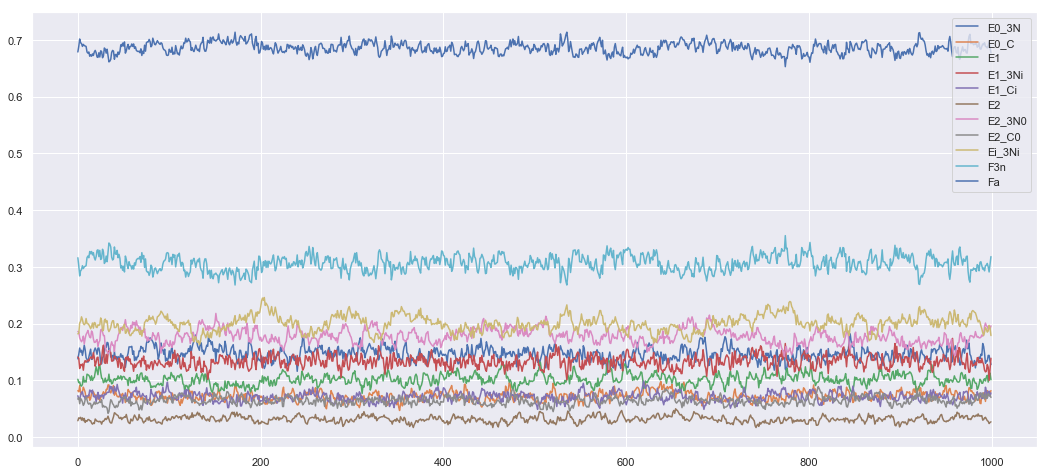

In [95]:
DF.plot(figsize = [18,8])

#### Current Measurement

In [99]:
S = 1.0

In [100]:
I_naca = S*DF["Fa"]*DF["F3n"]

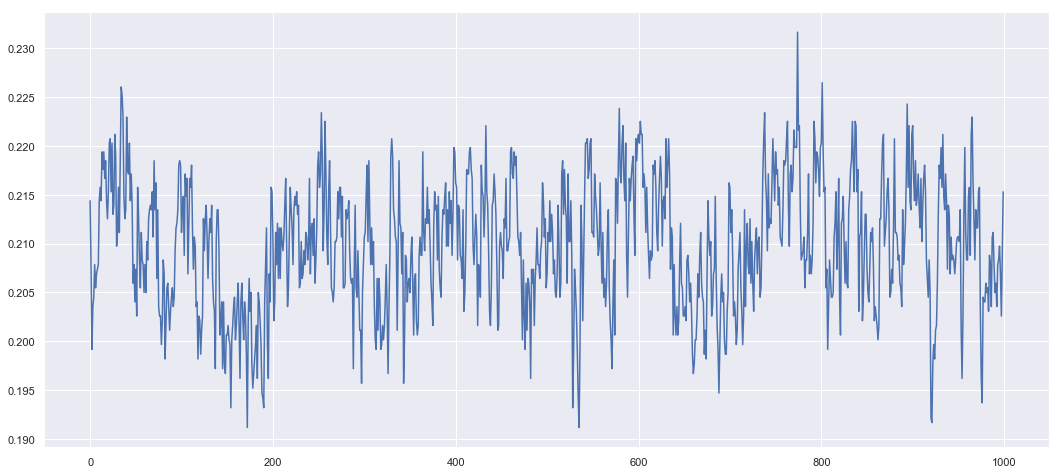

In [101]:
I_naca.plot(figsize = [18,8])

### Discussion